# Joe Stanley
### ECE 524 - HWK 3

In [1]:
# Import Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import eepower as eep
from eepower import u, m, k, M

In [2]:
# Define Givens

# Per-Unit Bases
Sbase = 30*M
Vb1 = 138*k
Vb2 = 13.8*k
Vb3 = 4.16*k

# Source
S_src = 3500*M #VA
XR_src = 15 #unitless
V_src = 138*k #V
Z_src = (0.0005701629473466338+0.008552444210199505j) # per-unit (from prev. assignment)

# Transformer(s)
S_xfm = 30*M #VA
Z_xfm = 7.5/100 #pu
XR_xfm = 18.6 #unitless
V_busA = 13.8*k #V
Z_xfm = (0.00402644303154544+0.07489184038674519j) # per-unit (from prev. assignment)

# Generator
S_gen = 35.3*M #VA
Xdv_gen = 10/100 #pu
XR_gen = 48 #unitless
Z_gen = (0.0017705382436260624+0.08498583569405099j) # per-unit (from prev. assignment)

# Motor Load (each motor)
P_mot = 30000 #hp
Xd_mot = 16.7/100 #pu
XR_mot = 10 #unitless
pf_mot = 0.8 #lagging

# Cap Bank
S_cap = 10*M #VAr

# Load Transformer
S_xfm_ld = 5*M #VA
Z_xfm_ld = 5.5/100 #pu
XR_xfm_ld = 7 #unitless
V_ld = 4.16*k #V

In [13]:
# Validate Formulas Prior to Solving Homework

# Use Example provided in Lecture 14 Handout
C1 = eep.farads(18*M,34.5*k)
C2 = eep.farads(10*M,34.5*k)
print(C*M)
I,F = eep.capbacktoback(C1=C2,C2=C1,Lm=19.2*u,VLL=34.5*k)
print(I,F)

40.114667445972366
24332.9875341 9596.14794355


## Problem 1 (text 6.3)
Find inrush current and frequency.

Sub-Bank Capacitance (C1/C2): 69.64351987147981 µF
Inrush Current: 17.1677423121 kA
Inrush Frequency: 6963.84576078 Hz


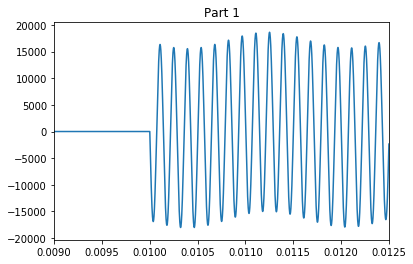

In [55]:
# Define Problem-Specifics
C_sub = 5*M # VAR
Lm = 15*u # H

# Evaluate Capacitance (in Farads)
Cf = eep.farads(C_sub,Vb2)
print("Sub-Bank Capacitance (C1/C2):",Cf*M,"µF")

# Evaluate Inrush Current and Frequency
Iin, Fin = eep.capbacktoback(Cf,Cf,Lm,VLL=Vb2)
print("Inrush Current:",Iin/k,"kA")
print("Inrush Frequency:",Fin,"Hz")

# Load Data from File
data = np.genfromtxt("HWK-3-p1.ADF",delimiter='\t',skip_header=2,usecols=(0,1),unpack=True)
t_arr, Vcap = data

# Plot Data
plt.plot(t_arr,Vcap)
plt.title("Part 1")
plt.xlim(0.009,0.0125)
plt.show()

## Problem 2 (text 6.4)
Evaluate what Lm must be to reduce the inrush current to 15kA, and to reduce the frequency to 2000Hz.

Required Inductance (Lm): 0.01964899999999488 mH
Resultant Inrush Current: 14.9999077837 kA
Required Inductance (Lm): 0.18185699999950347 mH
Resultant Inrush Frequency: 1999.99892319 Hz


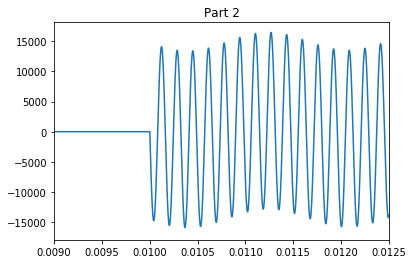

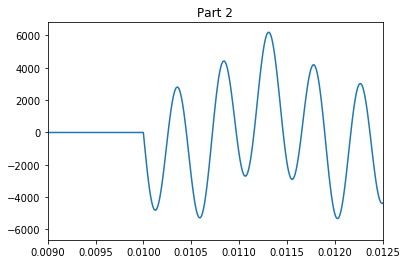

In [58]:
# Specify Test Step-Size
step = 0.001*u

# Iteratively solve for current requirement
Ldesired = Lm # Start with Lm
while True:
    # Solve for inrush current
    Iin, x = eep.capbacktoback(Cf,Cf,Ldesired,VLL=Vb2)
    # Test for completion
    if Iin <= 15*k:
        break # Found result
    # Increment Inductance
    Ldesired += step
print("Required Inductance (Lm):",Ldesired/m,"mH")
print("Resultant Inrush Current:",Iin/k,"kA")

# Iteratively solve for frequency requirement
Ldesired = Lm # Start with Lm
while True:
    # Solve for inrush current
    x, F = eep.capbacktoback(Cf,Cf,Ldesired,VLL=Vb2)
    # Test for completion
    if F <= 2000:
        break # Found result
    # Increment Inductance
    Ldesired += step
print("Required Inductance (Lm):",Ldesired/m,"mH")
print("Resultant Inrush Frequency:",F,"Hz")

# Load Data from File
data = np.genfromtxt("HWK-3-p2.ADF",delimiter='\t',skip_header=2,usecols=(0,1),unpack=True)
t_arr, Vcap = data

# Plot Data
plt.plot(t_arr,Vcap)
plt.title("Part 2")
plt.xlim(0.009,0.0125)
plt.show()

# Load Data from File
data = np.genfromtxt("HWK-3-p2b.ADF",delimiter='\t',skip_header=2,usecols=(0,1),unpack=True)
t_arr, Vcap = data

# Plot Data
plt.plot(t_arr,Vcap)
plt.title("Part 2")
plt.xlim(0.009,0.0125)
plt.show()

## Problem 3 (text 6.5)
Find the particular resistance for circuits (both open and closed bus-tie-breaker).

In [46]:
# Define Critically Damped Formula (from Lecture 12 Notes)
def critdamp(L,C):
    R = np.sqrt(1/(L*C))*2*L
    return(R)

# Define C - Delta-Cap-Bank
C = eep.farads(10*M,13.8*k)
print("Capacitance:",C/u,"µF")

# Define L (Breaker Open)
L = 0.0007096941825782752 # H (from HWK2)
# Evaluate R
CBO_R = critdamp(L,C)
print("CB-Open R:",CBO_R,"Ω")

# Define L (Breaker Closed)
L = 0.0005031692747875754 # H (from HWK2)
# Evaluate R
CBC_R = critdamp(L,C)
print("CB-Closed R:",CBC_R,"Ω")

Capacitance: 139.28703974295962 µF
CB-Open R: 4.51450630692 Ω
CB-Closed R: 3.80129608469 Ω


In [48]:
# Calculate Additional Bank Resistance
print("Additional CB-Open Resistor:",CBO_R-0.010184642321227273,"Ω")
print("Additional CB-Closed Resistor:",CBC_R-0.00828798310752,"Ω")

Additional CB-Open Resistor: 4.5043216646 Ω
Additional CB-Closed Resistor: 3.79300810159 Ω


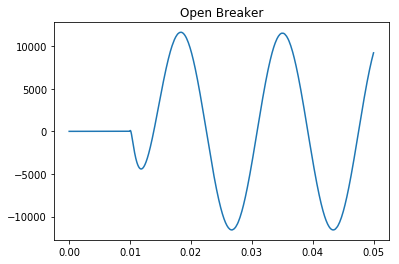

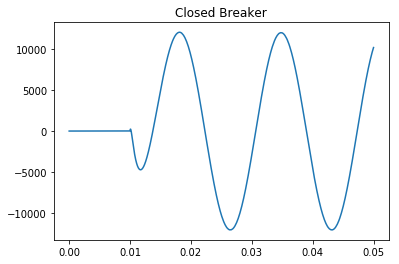

In [51]:
# Load Data from File
data = np.genfromtxt("HWK-3-p3A.ADF",delimiter='\t',skip_header=2,usecols=(0,1),unpack=True)
t_arr, Vcap = data

# Plot Data
plt.plot(t_arr,Vcap)
plt.title("Open Breaker")
plt.show()

# Load Data from File
data = np.genfromtxt("HWK-3-p3B.ADF",delimiter='\t',skip_header=2,usecols=(0,1),unpack=True)
t_arr, Vcap = data

# Plot Data
plt.plot(t_arr,Vcap)
plt.title("Closed Breaker")
plt.show()